<span style="font-size: 18px;">Developing ML models</span>

In [1]:
modelname = "M2ChlA"
classifiedbins = 9

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv(r"D:\AliFarrokhi\WQ dataset albufera\finalS2_AC20m_Meteocompletedbytwostation_NocloudsVisualize.csv")

list_bands = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']
dataset["Sat_date"] = pd.to_datetime(dataset["Sat_date"],format="%Y-%m-%d")
dataset["Date"] = pd.to_datetime(dataset["Date"],format="%Y-%m-%d")

for index, row in dataset.iterrows():
    if row["Sat_date"] > pd.Timestamp("2022-01-25"):
        dataset.loc[index,list_bands] -= 1000  #the offset applied in new updates of Sen2 dataset to avoid negative values which is subtracted here.
        ##add the link
equation = lambda x: round((x * 0.0001), 9)  #rescaling the reflectance values which is stated here https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED#bands
dataset[list_bands] = dataset[list_bands].applymap(equation)

#dataset.dropna(subset="SCL",inplace=True)
dataset=dataset.drop(columns=["SCL"])
        
dataset["Delay"] = (dataset["Sat_date"] - dataset["Date"]).dt.days
dataset["Month"] = (dataset["Date"]).dt.month

# Convert the 'Month' column to float
dataset['Month'] = dataset['Month'].astype(float)

# Replace the 'Month' column with its sine and cosine
dataset['Month_sin'] = np.sin(2 * np.pi * dataset['Month'] / 12)
dataset['Month_cos'] = np.cos(2 * np.pi * dataset['Month'] / 12)

# Drop the original 'Month' column
dataset = dataset.drop('Month', axis=1)

#explain the delay variables in user manual
dataset = dataset[(dataset["Delay"] !=2) & (dataset["Delay"] !=-2)]

dataset.dropna(subset="ChlA",inplace=True)

dataset=dataset.sort_values("Date",inplace=False)
dataset = dataset.reset_index(drop=True)
dataset


,Date,Sat_date,ROI,Temp,SD,ChlA,TN,TP,DO,SS,...,min_hum,med_hum,max_hum,min_pres,med_pres,max_pres,prec_tot,Delay,Month_sin,Month_cos
0,2016-01-13,2016-01-12,8,10.6,20.0,115.4,NaN,0.34,10.80,37.0,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
1,2016-01-13,2016-01-12,9,10.4,20.0,126.2,NaN,0.36,10.67,42.0,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
2,2016-01-13,2016-01-12,5,10.4,25.0,107.8,NaN,0.28,10.87,51.0,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
3,2016-01-13,2016-01-12,7,10.8,25.0,122.0,NaN,0.29,11.12,34.0,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
4,2016-01-13,2016-01-12,6,10.2,25.0,122.1,NaN,0.33,10.88,40.0,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2023-05-15,2023-05-15,6,22.2,15.0,47.0,NaN,0.60,11.13,166.0,...,43.0,64.1,81.0,1011.6,1014.2,1017.3,0.0,0,5.000000e-01,-0.866025
156,2023-05-15,2023-05-15,5,22.8,15.0,75.0,NaN,0.49,11.30,178.0,...,43.0,64.1,81.0,1011.6,1014.2,1017.3,0.0,0,5.000000e-01,-0.866025
157,2023-05-15,2023-05-15,7,23.3,20.0,50.0,NaN,0.42,12.24,128.0,...,43.0,64.1,81.0,1011.6,1014.2,1017.3,0.0,0,5.000000e-01,-0.866025
158,2023-06-23,2023-06-24,8,NaN,15.0,78.0,NaN,NaN,9.05,NaN,...,63.0,77.8,89.0,1018.9,1020.9,1022.8,0.0,1,1.224647e-16,-1.000000


In [2]:
dataset.columns

Index(['Date', 'Sat_date', 'ROI', 'Temp', 'SD', 'ChlA', 'TN', 'TP', 'DO', 'SS',
       'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12',
       'med_wind_speed', 'max_wind_speed', 'min_temp', 'med_temp', 'max_temp',
       'min_hum', 'med_hum', 'max_hum', 'min_pres', 'med_pres', 'max_pres',
       'prec_tot', 'Delay', 'Month_sin', 'Month_cos'],
      dtype='object')

In [3]:
dataset['Sat_date'] = pd.to_datetime(dataset['Sat_date'])
dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset=dataset.drop(columns=['SD', 'Temp', 'TP', 'TN', 'SS', 'DO'])

dataset = dataset.dropna(subset="ChlA",inplace=False)

dataset = dataset.dropna(axis=0,inplace=False)


dataset



,Date,Sat_date,ROI,ChlA,B02,B03,B04,B05,B06,B07,...,min_hum,med_hum,max_hum,min_pres,med_pres,max_pres,prec_tot,Delay,Month_sin,Month_cos
0,2016-01-13,2016-01-12,8,115.4,0.042433,0.094344,0.063511,0.140889,0.090622,0.086167,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
1,2016-01-13,2016-01-12,9,126.2,0.041100,0.090956,0.059933,0.130300,0.080122,0.077044,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
2,2016-01-13,2016-01-12,5,107.8,0.040022,0.091978,0.061067,0.135189,0.084678,0.080967,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
3,2016-01-13,2016-01-12,7,122.0,0.040178,0.092422,0.063600,0.139611,0.087978,0.084833,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
4,2016-01-13,2016-01-12,6,122.1,0.041611,0.093444,0.062900,0.130789,0.079644,0.077256,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2023-05-15,2023-05-15,6,47.0,0.044878,0.100844,0.054267,0.132211,0.077000,0.077156,...,43.0,64.1,81.0,1011.6,1014.2,1017.3,0.0,0,5.000000e-01,-0.866025
156,2023-05-15,2023-05-15,5,75.0,0.052322,0.109000,0.061200,0.135856,0.080311,0.079656,...,43.0,64.1,81.0,1011.6,1014.2,1017.3,0.0,0,5.000000e-01,-0.866025
157,2023-05-15,2023-05-15,7,50.0,0.048622,0.099622,0.056022,0.126133,0.072744,0.071267,...,43.0,64.1,81.0,1011.6,1014.2,1017.3,0.0,0,5.000000e-01,-0.866025
158,2023-06-23,2023-06-24,8,78.0,0.107744,0.165778,0.116067,0.204556,0.133789,0.134200,...,63.0,77.8,89.0,1018.9,1020.9,1022.8,0.0,1,1.224647e-16,-1.000000


In [4]:
dataset = dataset.sort_values(by=['Sat_date', 'ChlA'])


dataset


,Date,Sat_date,ROI,ChlA,B02,B03,B04,B05,B06,B07,...,min_hum,med_hum,max_hum,min_pres,med_pres,max_pres,prec_tot,Delay,Month_sin,Month_cos
2,2016-01-13,2016-01-12,5,107.8,0.040022,0.091978,0.061067,0.135189,0.084678,0.080967,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
0,2016-01-13,2016-01-12,8,115.4,0.042433,0.094344,0.063511,0.140889,0.090622,0.086167,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
3,2016-01-13,2016-01-12,7,122.0,0.040178,0.092422,0.063600,0.139611,0.087978,0.084833,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
4,2016-01-13,2016-01-12,6,122.1,0.041611,0.093444,0.062900,0.130789,0.079644,0.077256,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
1,2016-01-13,2016-01-12,9,126.2,0.041100,0.090956,0.059933,0.130300,0.080122,0.077044,...,47.6,65.5,81.3,1022.6,1025.2,1027.7,0.0,-1,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2023-05-15,2023-05-15,8,51.0,0.045833,0.094689,0.052122,0.121044,0.070456,0.069400,...,43.0,64.1,81.0,1011.6,1014.2,1017.3,0.0,0,5.000000e-01,-0.866025
153,2023-05-15,2023-05-15,9,55.0,0.069500,0.110800,0.073067,0.147822,0.093222,0.093300,...,43.0,64.1,81.0,1011.6,1014.2,1017.3,0.0,0,5.000000e-01,-0.866025
156,2023-05-15,2023-05-15,5,75.0,0.052322,0.109000,0.061200,0.135856,0.080311,0.079656,...,43.0,64.1,81.0,1011.6,1014.2,1017.3,0.0,0,5.000000e-01,-0.866025
159,2023-06-23,2023-06-24,7,68.0,0.101567,0.169056,0.115511,0.200244,0.124289,0.125733,...,63.0,77.8,89.0,1018.9,1020.9,1022.8,0.0,1,1.224647e-16,-1.000000


In [5]:
dataset.describe()

,ROI,ChlA,B02,B03,B04,B05,B06,B07,B8A,B11,...,min_hum,med_hum,max_hum,min_pres,med_pres,max_pres,prec_tot,Delay,Month_sin,Month_cos
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,6.518750,99.584434,0.040274,0.078217,0.046350,0.087404,0.045300,0.045031,0.030295,0.015653,...,56.984375,76.163125,88.88875,1015.210625,1017.260625,1019.409375,0.715000,-0.175000,-0.111438,-0.240116
std,2.003054,71.990925,0.020314,0.022860,0.020772,0.029319,0.026602,0.026520,0.021638,0.017704,...,12.979716,8.075801,5.24806,6.065415,5.918387,5.947969,4.952176,0.843398,0.695959,0.671875
min,1.000000,3.600000,0.012722,0.025700,0.018711,0.038967,0.005733,0.006522,0.001833,0.000100,...,26.000000,55.400000,74.00000,1004.200000,1006.300000,1008.400000,0.000000,-1.000000,-1.000000,-1.000000
25%,5.000000,41.225000,0.026944,0.063964,0.031550,0.067253,0.026083,0.025331,0.013936,0.001686,...,45.000000,71.100000,85.00000,1011.600000,1013.500000,1015.400000,0.000000,-1.000000,-0.866025,-0.866025
50%,7.000000,78.450000,0.034506,0.074167,0.040311,0.080611,0.037283,0.036394,0.022328,0.007789,...,58.000000,77.300000,91.70000,1014.000000,1016.600000,1018.550000,0.000000,0.000000,-0.500000,-0.500000
75%,8.000000,151.250000,0.047842,0.092089,0.058056,0.102331,0.060561,0.062569,0.046419,0.023372,...,68.000000,83.100000,93.00000,1016.700000,1018.300000,1020.900000,0.000000,1.000000,0.500000,0.500000
max,9.000000,315.000000,0.107744,0.169056,0.137667,0.204556,0.133789,0.134200,0.097756,0.074967,...,80.000000,88.500000,96.00000,1033.700000,1035.800000,1037.800000,36.400000,1.000000,1.000000,1.000000


In [6]:
dataset['ChlA'].var()

5182.693250010982

In [7]:
dataset['ChlA'].mean()

99.584434368125

<span style="font-size: 18px;">ChlA model</span>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

Target_variable = "ChlA"
df = dataset.copy()


bands = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']

equations = [("A/B", lambda A, B: A / B),
             ("ln(A)", lambda A: np.log(A)),  # <-- changed here
             ("(A+B) / (A-B)", lambda A, B: (A + B) / (A - B)),
             ("(A-B) / (A+B)", lambda A, B: (A - B) / (A + B)),
             ("A-B", lambda A, B: A - B),
             ("A+B", lambda A, B: A + B),
             ("A*B", lambda A, B: A * B),
             ("A**2", lambda A: A ** 2),
             ("1 / sqrt(A+B)", lambda A, B: 1 / np.sqrt(A + B)),
             ("1 / sqrt(A-B)", lambda A, B: 1 / np.sqrt(A - B)),
             ("ln(A / B)", lambda A, B: np.log(A / B))]
df_to_concat = []
for eq_name, eq in equations:
    column_eq = []
    for band1 in bands:
        for band2 in bands:
            if "A" in eq_name and "B" in eq_name:  # if the equation requires two bands
                newcolumn = f"{eq_name}({band1}, {band2})"
                column_eq.append(pd.DataFrame({newcolumn: eq(df[band1],df[band2])}))
            else:  
                newcolumn = f"{eq_name}({band1})"
                if newcolumn in [df.columns for df in column_eq]:  # if the column already exists
                    continue
                column_eq.append(pd.DataFrame({newcolumn: eq(df[band1])}))
             

            
    ChlA_df = pd.concat(column_eq,axis=1)
    df_to_concat.append(ChlA_df)

df = pd.concat([df] + df_to_concat,axis = 1)

nan_column = df.columns[df.isnull().any()]
inf_column = df.select_dtypes(include=[np.number]).columns[np.isinf(df.select_dtypes(include=[np.number])).any()]
dropcol = set(nan_column) | set(inf_column)

df = df.drop(columns=dropcol)

excluded_columns = ['Date', 'Sat_date', 'ROI', 'med_wind_speed', 'max_wind_speed','min_temp', 'med_temp', 'max_temp',
       'min_hum', 'med_hum', 'max_hum', 'min_pres', 'med_pres', 'max_pres',
       'prec_tot', 'Delay', 'Month_sin','Month_cos','B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']

    
    
X = df[[col for col in df.columns if col not in excluded_columns + [Target_variable]]]
y = df[Target_variable]

# Split data into train and test sets
Value_ranges = pd.cut(df['ChlA'], bins=classifiedbins, labels=False)

# Split the data into training and testing sets, ensuring stratified sampling based on ChlA ranges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=Value_ranges)


xgb_params = {
    'n_estimators': 50,
    'max_depth': 10,
    'learning_rate': 0.1
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, **xgb_params)
xgb_model.fit(X_train,y_train)

feature_importance_xgb = xgb_model.feature_importances_

treshold_score = 0.04

indices_importantfeatures = [ i for i, importance in enumerate(feature_importance_xgb) if importance > treshold_score]

importantfeature_xgb = X.columns[indices_importantfeatures]

df2band = df[importantfeature_xgb]


importancescore_xgb = feature_importance_xgb[indices_importantfeatures]

for feature, importance in zip(importantfeature_xgb,importancescore_xgb):
    print(f"{feature}: {importance}")

df2band

C:\Users\Laboratorio_TN\.conda\envs\gee\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(A+B) / (A-B)(B02, B07): 0.07222654670476913
(A+B) / (A-B)(B04, B8A): 0.181833878159523
A-B(B04, B05): 0.2631283104419708
A-B(B07, B12): 0.07409165054559708


,"(A+B) / (A-B)(B02, B07)","(A+B) / (A-B)(B04, B8A)","A-B(B04, B05)","A-B(B07, B12)"
2,-2.954949,8.402906,-0.074122,0.077211
0,-2.940544,8.590635,-0.077378,0.083700
3,-2.799456,8.563910,-0.076011,0.080678
4,-3.334784,5.997519,-0.067889,0.073644
1,-3.286865,6.549368,-0.070367,0.073711
...,...,...,...,...
154,-4.889666,8.091134,-0.068922,0.059300
153,-6.840336,12.060569,-0.074755,0.067522
156,-4.828444,7.687690,-0.074656,0.066578
159,-9.405543,6.666674,-0.084733,0.080633


In [10]:
#3band

Target_variable = "ChlA"
df = dataset.copy()

# List of equations

equations_three_bands = [
    ("(A * B) / C", lambda A, B, C: (A * B) / C),
    ("((1/A) - (1/B)) * C", lambda A, B, C: (((1/A) - (1/B)) * C)),
    ("(A + B + C)", lambda A, B, C: (A + B + C)),
    ("A / (B + C)", lambda A, B, C: A / (B + C)),
    ("(A + B) / C", lambda A, B, C: (A + B) / C),
    ("(A - B) / (A + B + C)", lambda A, B, C: (A - B) / (A + B + C)),
    ("(A + B + C) / (A - B)", lambda A, B, C: (A + B + C) / (A - B)),
    ("(A - B) / (A + B) / C", lambda A, B, C: (A - B) / (A + B) / C),
    ("(A + B) / (A - C)", lambda A, B, C: (A + B) / (A - C)),
    ("((A - B) / (A + B)) / ((A - C) / (A + C))", lambda A, B, C: ((A - B) / (A + B)) / ((A - C) / (A + C))),
]

# List of bands
bands_three = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']


new_columns_dfs = []
# Apply equations and add columns to the DataFrames
for equation_name, equation_func in equations_three_bands:
    
    for band1 in bands_three:
        for band2 in bands_three:
            for band3 in bands_three:
                # Create a new DataFrame with the equation result
                new_column_name = f"{equation_name}({band1}, {band2}, {band3})"
                new_df = pd.DataFrame({new_column_name: equation_func(df[band1], df[band2], df[band3])})
                new_columns_dfs.append(new_df)
             

df = pd.concat([df] + new_columns_dfs, axis=1)


nan_columns = df.columns[df.isnull().any()]
inf_columns = df.select_dtypes(include=[np.number]).columns[np.isinf(df.select_dtypes(include=[np.number])).any()]
columns_to_drop = set(nan_columns) | set(inf_columns)
df = df.drop(columns=columns_to_drop)

columns_to_exclude = ['Date', 'Sat_date', 'ROI', 'med_wind_speed', 'max_wind_speed','min_temp', 'med_temp', 'max_temp',
       'min_hum', 'med_hum', 'max_hum', 'min_pres', 'med_pres', 'max_pres',
       'prec_tot', 'Delay', 'Month_sin',
       'Month_cos','B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']


X = df[[col for col in df.columns if col not in excluded_columns + [Target_variable]]]
y = df[Target_variable]

# Split data into train and test sets
Value_ranges = pd.cut(df['ChlA'], bins=classifiedbins, labels=False)

# Split the data into training and testing sets, ensuring stratified sampling based on ChlA ranges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=Value_ranges)


xgb_params = {
    'n_estimators': 50,
    'max_depth': 10,
    'learning_rate': 0.1
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, **xgb_params)
xgb_model.fit(X_train,y_train)


feature_importance_xgb = xgb_model.feature_importances_


threshold_xgb = 0.04


important_indices_xgb = [i for i, importance in enumerate(feature_importance_xgb) if importance > threshold_xgb]
important_features_xgb = X.columns[important_indices_xgb]
important_importances_xgb = feature_importance_xgb[important_indices_xgb]
df3band = df[important_features_xgb]
print("Important features with XGBoost feature importance:")
for feature, importance in zip(important_features_xgb, important_importances_xgb):
    print(f"{feature}: {importance}")


Important features with XGBoost feature importance:
((1/A) - (1/B)) * C(B02, B06, B03): 0.0613078698515892
A / (B + C)(B03, B02, B05): 0.09816105663776398
A / (B + C)(B04, B02, B06): 0.05428881198167801
A / (B + C)(B06, B04, B07): 0.22801783680915833
A / (B + C)(B07, B03, B04): 0.06012668460607529
((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A): 0.06823723763227463


In [11]:
Target_variable = "ChlA"
df = dataset.copy()


# List of equations for up to 4 bands
equations_four_bands = [
    ("A + B + C + D", lambda A, B, C, D: A + B + C + D),
    ("A / (B + C + D)", lambda A, B, C, D: A / (B + C + D)),
    ("(A + B) / (C + D)", lambda A, B, C, D: (A + B) / (C + D)),
    ("(A - B) / (C + D)", lambda A, B, C, D: (A - B) / (C + D)),
    ("((A - B) / (A + B)) / ((C - D) / (C + D))", lambda A, B, C, D: ((A - B) / (A + B)) / ((C - D) / (C + D))),
]

# List of bands
bands_four = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']

# Create a list to hold DataFrames with the new columns
new_columns_dfs = []

# Apply equations and add columns to the DataFrames
for equation_name, equation_func in equations_four_bands:
    for band1 in bands_four:
        for band2 in bands_four:
            for band3 in bands_four:
                for band4 in bands_four:
                    # Create a new DataFrame with the equation result
                    new_column_name = f"{equation_name}({band1}, {band2}, {band3}, {band4})"
                    new_df = pd.DataFrame({new_column_name: equation_func(df[band1], df[band2], df[band3], df[band4])})
                    new_columns_dfs.append(new_df)
                    


# Concatenate all DataFrames in the list along axis=1
df = pd.concat([df] + new_columns_dfs, axis=1)

# Find columns with NaN values
nan_columns = df.columns[df.isnull().any()]

# Find columns with infinite values
inf_columns = df.select_dtypes(include=[np.number]).columns[np.isinf(df.select_dtypes(include=[np.number])).any()]

# Combine columns with NaN or infinite values
columns_to_drop = set(nan_columns) | set(inf_columns)

# Drop columns with NaN or infinite values
df = df.drop(columns=columns_to_drop)

columns_to_exclude = ['Date', 'Sat_date', 'ROI', 'med_wind_speed', 'max_wind_speed','min_temp', 'med_temp', 'max_temp',
       'min_hum', 'med_hum', 'max_hum', 'min_pres', 'med_pres', 'max_pres',
       'prec_tot', 'Delay', 'Month_sin','Month_cos','B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A', 'B11', 'B12']


X = df[[col for col in df.columns if col not in excluded_columns + [Target_variable]]]
y = df[Target_variable]


# Split data into train and test sets
Value_ranges = pd.cut(df['ChlA'], bins=classifiedbins, labels=False)

# Split the data into training and testing sets, ensuring stratified sampling based on ChlA ranges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=Value_ranges)


xgb_params = {
    'n_estimators': 50,
    'max_depth': 10,
    'learning_rate': 0.1
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, **xgb_params)
xgb_model.fit(X_train,y_train)

# Get feature importance from XGBoost
feature_importance_xgb = xgb_model.feature_importances_

# Set a threshold for XGBoost feature importance
threshold_xgb = 0.04

# Print indices with XGBoost importance above the threshold
important_indices_xgb = [i for i, importance in enumerate(feature_importance_xgb) if importance > threshold_xgb]
important_features_xgb = X.columns[important_indices_xgb]
important_importances_xgb = feature_importance_xgb[important_indices_xgb]

df4band = df[important_features_xgb]
df4band
print("Important features with XGBoost feature importance:")
for feature, importance in zip(important_features_xgb, important_importances_xgb):
    print(f"{feature}: {importance}")



Important features with XGBoost feature importance:
A / (B + C + D)(B07, B05, B11, B12): 0.04636918380856514
(A - B) / (C + D)(B06, B07, B11, B11): 0.11139184236526489
((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05): 0.17123067378997803
((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07): 0.0995459258556366
((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12): 0.053251709789037704


In [12]:
import string
indices = pd.concat([df2band,df3band,df4band],axis=1)
# Concatenate the dataframes
indices = pd.concat([df2band, df3band, df4band], axis=1)
indices

,"(A+B) / (A-B)(B02, B07)","(A+B) / (A-B)(B04, B8A)","A-B(B04, B05)","A-B(B07, B12)","((1/A) - (1/B)) * C(B02, B06, B03)","A / (B + C)(B03, B02, B05)","A / (B + C)(B04, B02, B06)","A / (B + C)(B06, B04, B07)","A / (B + C)(B07, B03, B04)","((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A)","A / (B + C + D)(B07, B05, B11, B12)","(A - B) / (C + D)(B06, B07, B11, B11)","((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05)","((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07)","((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12)"
2,-2.954949,8.402906,-0.074122,0.077211,1.211960,0.524954,0.489709,0.596182,0.529040,-1.361299,0.570456,0.620814,1.042155,0.164735,1.004082
0,-2.940544,8.590635,-0.077378,0.083700,1.182284,0.514637,0.477328,0.605449,0.545858,-1.511040,0.586656,0.632488,1.002558,0.083498,1.002821
3,-2.799456,8.563910,-0.076011,0.080678,1.249813,0.514060,0.496272,0.592709,0.543726,-1.377308,0.575922,0.444981,1.053335,0.100944,1.003516
4,-3.334784,5.997519,-0.067889,0.073644,1.072390,0.542021,0.518739,0.568257,0.494137,-0.704516,0.561179,0.365629,1.094971,0.309843,1.002814
1,-3.286865,6.549368,-0.070367,0.073711,1.077821,0.530663,0.494409,0.584929,0.510603,-0.944087,0.566179,0.629561,1.020649,0.246546,1.003335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-4.889666,8.091134,-0.068922,0.059300,0.721990,0.567415,0.448213,0.579776,0.472716,-1.210154,0.486222,0.045544,0.873523,0.541120,1.004464
153,-6.840336,12.060569,-0.074755,0.067522,0.405687,0.509842,0.449027,0.560342,0.507433,-1.461834,0.458351,-0.001299,0.676839,0.381023,0.999501
156,-4.828444,7.687690,-0.074656,0.066578,0.726024,0.579239,0.461423,0.570166,0.468012,-1.038224,0.485935,0.021866,0.927353,0.581127,1.002757
159,-9.405543,6.666674,-0.084733,0.080633,0.304296,0.560137,0.511438,0.515199,0.441841,-0.244031,0.426488,-0.014600,0.929321,0.667643,0.990461


In [13]:
dataset = pd.concat([dataset,indices],axis=1)

In [14]:
dataset.columns

Index(['Date', 'Sat_date', 'ROI', 'ChlA', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B8A', 'B11', 'B12', 'med_wind_speed', 'max_wind_speed',
       'min_temp', 'med_temp', 'max_temp', 'min_hum', 'med_hum', 'max_hum',
       'min_pres', 'med_pres', 'max_pres', 'prec_tot', 'Delay', 'Month_sin',
       'Month_cos', '(A+B) / (A-B)(B02, B07)', '(A+B) / (A-B)(B04, B8A)',
       'A-B(B04, B05)', 'A-B(B07, B12)', '((1/A) - (1/B)) * C(B02, B06, B03)',
       'A / (B + C)(B03, B02, B05)', 'A / (B + C)(B04, B02, B06)',
       'A / (B + C)(B06, B04, B07)', 'A / (B + C)(B07, B03, B04)',
       '((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A)',
       'A / (B + C + D)(B07, B05, B11, B12)',
       '(A - B) / (C + D)(B06, B07, B11, B11)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12)'],
      dtype='object')

In [15]:
dataset['TBDOI'] = dataset['B06'] * ((1 / dataset['B04']) - (1 / dataset['B05']))#*(Towards a unified approach for remote estimation of chlorophyll-a in both terrestrial vegetation and turbid productive waters)
dataset['QB4'] = (dataset['B06']-dataset['B02'])/(dataset['B03']+dataset['B05'])#*(Validación de algoritmos para la estimación de la Clorofila-a con Sentinel-2 en la Albufera de Valencia translated paper of Validacionalgoritmosclorofila)
dataset['ND4I'] = (dataset['B03']-dataset['B05'])/(dataset['B03']+dataset['B05'])#*ND4I
dataset['ND4II'] = (dataset['B05']-dataset['B04'])/(dataset['B05']+dataset['B04'])#*ND4II(Evaluation of Sentinel-2 and Landsat 8 Images for Estimating Chlorophyll-a Concentrations in Lake Chad, Africa)
dataset['GR'] = (dataset['B03']/dataset['B04'])  #*canceled for writing cuz low correlation(Selecting the Best Band Ratio to Estimate Chlorophyll-a Concentration in a Tropical Freshwater Lake Using Sentinel 2A Images from a Case Study of Lake Ba Be (Northern Vietnam))
dataset['TBDOII'] = dataset['B8A'] * ((1 / dataset['B04']) - (1 / dataset['B05']))#*TBDOII(Ref folder ChlA index TBDO2)
dataset['NIRR'] = (dataset['B05']/dataset['B04'])#*canceled for writing cuz low correlation(Selecting

In [16]:
dataset = dataset.dropna(axis=1)
dataset.columns

Index(['Date', 'Sat_date', 'ROI', 'ChlA', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B8A', 'B11', 'B12', 'med_wind_speed', 'max_wind_speed',
       'min_temp', 'med_temp', 'max_temp', 'min_hum', 'med_hum', 'max_hum',
       'min_pres', 'med_pres', 'max_pres', 'prec_tot', 'Delay', 'Month_sin',
       'Month_cos', '(A+B) / (A-B)(B02, B07)', '(A+B) / (A-B)(B04, B8A)',
       'A-B(B04, B05)', 'A-B(B07, B12)', '((1/A) - (1/B)) * C(B02, B06, B03)',
       'A / (B + C)(B03, B02, B05)', 'A / (B + C)(B04, B02, B06)',
       'A / (B + C)(B06, B04, B07)', 'A / (B + C)(B07, B03, B04)',
       '((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A)',
       'A / (B + C + D)(B07, B05, B11, B12)',
       '(A - B) / (C + D)(B06, B07, B11, B11)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12)',
       'TBDOI', 'QB4', 'ND4I', 'ND4

Top 20 Important Features:
((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05): 0.35276222229003906
((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A): 0.24437330663204193
TBDOII: 0.09805043786764145
((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12): 0.09313787519931793
A-B(B04, B05): 0.07380945980548859
((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07): 0.02498258464038372
A / (B + C)(B04, B02, B06): 0.020248621702194214
TBDOI: 0.015082817524671555
A / (B + C)(B03, B02, B05): 0.012660364620387554
ND4II: 0.010393719188869
A / (B + C)(B07, B03, B04): 0.010068351402878761
A-B(B07, B12): 0.00790901854634285
(A - B) / (C + D)(B06, B07, B11, B11): 0.007807309273630381
ND4I: 0.007575285620987415
GR: 0.00679092388600111


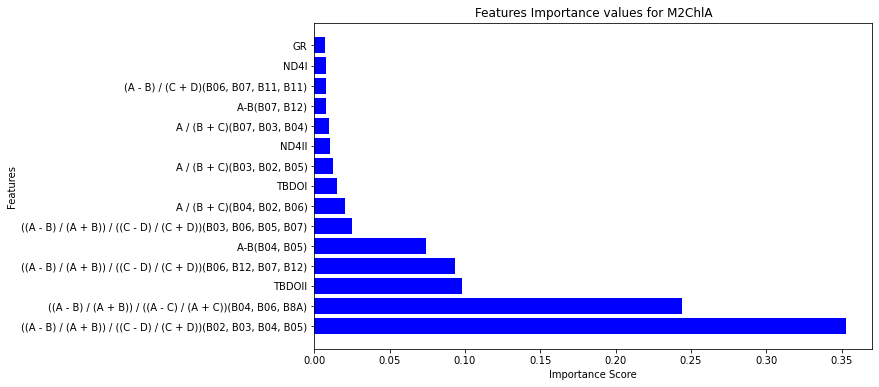

In [17]:
#Choosing the best features for model with builtin XGBoost function
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


#considering all data sat+meteo data+date
#X = dataset[dataset.columns[4:]]
  
#considering only sat data
columns_to_exclude = ['Date', 'Sat_date', 'ROI', 'med_wind_speed', 'max_wind_speed','min_temp', 'med_temp', 'max_temp','min_hum', 'med_hum', 'max_hum', 'min_pres', 'med_pres', 'max_pres','prec_tot', 'Delay', 'Month_sin', 'Month_cos']
X = dataset[[col for col in dataset.columns if col not in excluded_columns + [Target_variable]]]


.ini
#considering meteo data+date
#X = dataset[dataset.columns[13:25]]

y = dataset['ChlA']  

# Split data into train and test sets
ChlA_ranges = pd.cut(dataset['ChlA'], bins=classifiedbins, labels=False)

# Split the data into training and testing sets, ensuring stratified sampling based on ChlA ranges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=ChlA_ranges)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize XGBoost regressor with the specified hyperparameters

xgb_params = {
    'n_estimators': 50,
    'max_depth': 10,
    'learning_rate': 0.1
}
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42,**xgb_params)


xgb_model.fit(X_train, y_train)
feature_importances = xgb_model.feature_importances_

# Get the indices of the top features
top_15_feature_indices = np.argsort(feature_importances)[::-1][:15]
# Get the names and importance scores
top_15_features = X.columns[top_15_feature_indices]
top_15_importances = feature_importances[top_15_feature_indices]


print("Top 20 Important Features:")
for feature, importance in zip(top_15_features, top_15_importances):
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6), facecolor='white')
plt.barh(top_15_features, top_15_importances, color='blue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title(fr'Features Importance values for {modelname}')
plt.savefig(fr'D:\AliFarrokhi\Albufera models\{modelname}_featureimportance.png', bbox_inches='tight', pad_inches=0.5, facecolor='w')

plt.show()


In [18]:
top_15_features

Index(['((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05)',
       '((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A)', 'TBDOII',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12)',
       'A-B(B04, B05)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07)',
       'A / (B + C)(B04, B02, B06)', 'TBDOI', 'A / (B + C)(B03, B02, B05)',
       'ND4II', 'A / (B + C)(B07, B03, B04)', 'A-B(B07, B12)',
       '(A - B) / (C + D)(B06, B07, B11, B11)', 'ND4I', 'GR'],
      dtype='object')

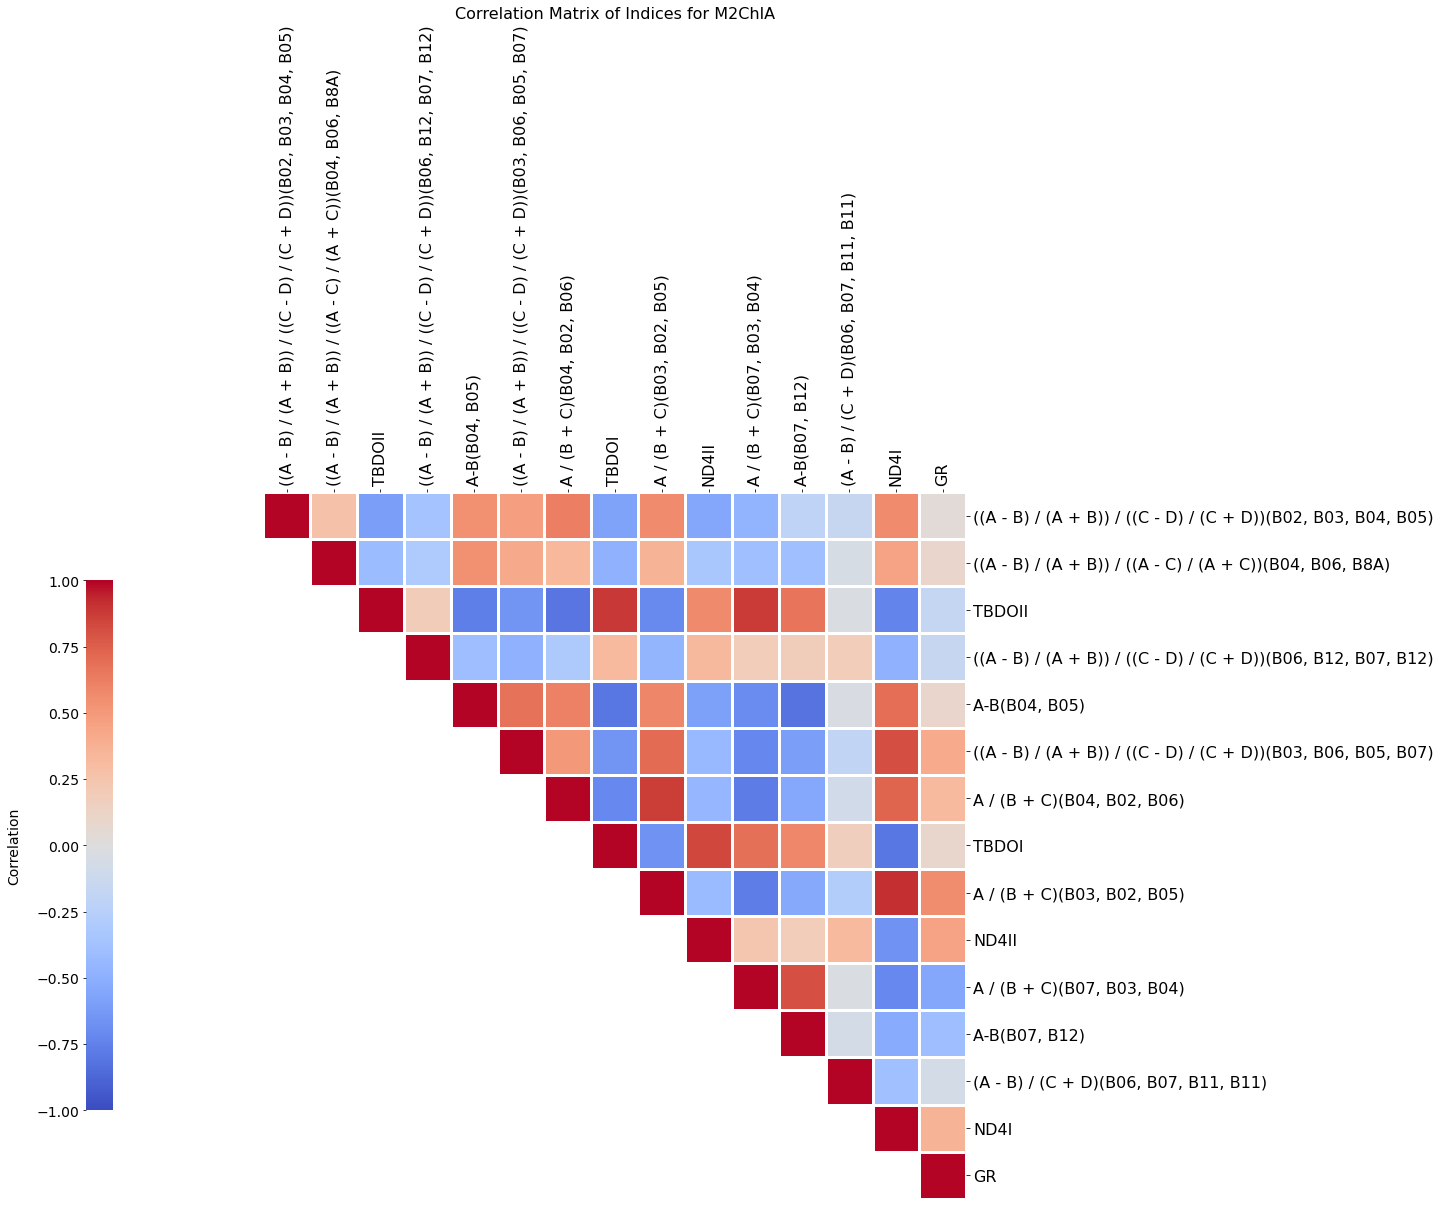

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute the correlation matrix
correlation_matrix = dataset[top_15_features].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Add diagonal values manually
np.fill_diagonal(correlation_matrix.values, 1.0)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 13), facecolor='white')

heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=3, mask=~mask, cbar=True, vmin=-1, vmax=1, cbar_kws={"shrink": 0.75, "pad": 0.15, "location": "left"})
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Correlation', fontsize=14, labelpad=15)

# Move x-axis ticks to the top and rotate
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False, rotation=90, labelsize=12)
xticks_positions = np.arange(len(correlation_matrix.columns))
xticks_labels = correlation_matrix.columns
heatmap.set_xticks(xticks_positions + 0.5)
heatmap.set_xticklabels(xticks_labels, fontsize=16)

# Move y-axis ticks to the right and rotate
plt.tick_params(axis='y', right=True, labelright=True, left=False, labelleft=False, rotation=0, labelsize=12)
yticks_positions = np.arange(len(correlation_matrix.index))
yticks_labels = correlation_matrix.index
heatmap.set_yticks(yticks_positions + 0.5)
heatmap.set_yticklabels(yticks_labels, fontsize=16)
plt.title(fr'Correlation Matrix of Indices for {modelname}', fontsize=16)

plt.savefig(fr'D:\AliFarrokhi\Albufera models\{modelname}_corrmatrix.png', bbox_inches='tight', pad_inches=0.5, facecolor='w')

plt.show()


In [20]:
hum_vars = [var for var in top_15_features if '_hum' in var]

if hum_vars:  # Check if temp_vars is not empty
    hum_vars = hum_vars[1:]
    top_15_features = [var for var in top_15_features if var not in hum_vars]
    
temp_vars = [var for var in top_15_features if '_temp' in var]

if temp_vars:  # Check if temp_vars is not empty
    temp_vars = temp_vars[1:]
    top_15_features = [var for var in top_15_features if var not in temp_vars]
    
pres_vars = [var for var in top_15_features if '_pres' in var]

if pres_vars:  # Check if temp_vars is not empty
    pres_vars = pres_vars[1:]
    top_15_features = [var for var in top_15_features if var not in pres_vars]

wind_vars = [var for var in top_15_features if '_wind_speed' in var]

if wind_vars:  # Check if temp_vars is not empty
    wind_vars = wind_vars[1:]
    top_15_features = [var for var in top_15_features if var not in wind_vars]

print("Filtered features:", top_15_features)


Filtered features: Index(['((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05)',
       '((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A)', 'TBDOII',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12)',
       'A-B(B04, B05)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07)',
       'A / (B + C)(B04, B02, B06)', 'TBDOI', 'A / (B + C)(B03, B02, B05)',
       'ND4II', 'A / (B + C)(B07, B03, B04)', 'A-B(B07, B12)',
       '(A - B) / (C + D)(B06, B07, B11, B11)', 'ND4I', 'GR'],
      dtype='object')


In [21]:
top_15_features

Index(['((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05)',
       '((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A)', 'TBDOII',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12)',
       'A-B(B04, B05)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07)',
       'A / (B + C)(B04, B02, B06)', 'TBDOI', 'A / (B + C)(B03, B02, B05)',
       'ND4II', 'A / (B + C)(B07, B03, B04)', 'A-B(B07, B12)',
       '(A - B) / (C + D)(B06, B07, B11, B11)', 'ND4I', 'GR'],
      dtype='object')

In [22]:
dataset.columns


Index(['Date', 'Sat_date', 'ROI', 'ChlA', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B8A', 'B11', 'B12', 'med_wind_speed', 'max_wind_speed',
       'min_temp', 'med_temp', 'max_temp', 'min_hum', 'med_hum', 'max_hum',
       'min_pres', 'med_pres', 'max_pres', 'prec_tot', 'Delay', 'Month_sin',
       'Month_cos', '(A+B) / (A-B)(B02, B07)', '(A+B) / (A-B)(B04, B8A)',
       'A-B(B04, B05)', 'A-B(B07, B12)', '((1/A) - (1/B)) * C(B02, B06, B03)',
       'A / (B + C)(B03, B02, B05)', 'A / (B + C)(B04, B02, B06)',
       'A / (B + C)(B06, B04, B07)', 'A / (B + C)(B07, B03, B04)',
       '((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A)',
       'A / (B + C + D)(B07, B05, B11, B12)',
       '(A - B) / (C + D)(B06, B07, B11, B11)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12)',
       'TBDOI', 'QB4', 'ND4I', 'ND4

In [23]:
top_15_features[0:15]

Index(['((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05)',
       '((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A)', 'TBDOII',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12)',
       'A-B(B04, B05)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07)',
       'A / (B + C)(B04, B02, B06)', 'TBDOI', 'A / (B + C)(B03, B02, B05)',
       'ND4II', 'A / (B + C)(B07, B03, B04)', 'A-B(B07, B12)',
       '(A - B) / (C + D)(B06, B07, B11, B11)', 'ND4I', 'GR'],
      dtype='object')

testsize 0.2
Kfolds 5
classified bins 9
Number of features 9
Selected feature: Index(['((A - B) / (A + B)) / ((C - D) / (C + D))(B02, B03, B04, B05)',
       '((A - B) / (A + B)) / ((A - C) / (A + C))(B04, B06, B8A)', 'TBDOII',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B06, B12, B07, B12)',
       'A-B(B04, B05)',
       '((A - B) / (A + B)) / ((C - D) / (C + D))(B03, B06, B05, B07)',
       'A / (B + C)(B04, B02, B06)', 'A / (B + C)(B03, B02, B05)', 'ND4II',
       'Month_sin', 'Month_cos'],
      dtype='object')
100%|█████████████████████████████████████████████| 100/100 [00:15<00:00,  6.45trial/s, best loss: -0.6409145906078523]
Best Hyperparameters:
{'n_estimators': 23, 'max_depth': 4, 'learning_rate': 0.11318541740604031, 'alpha': 0.270085373264245, 'lambda': 0.9412578896776336, 'gamma': 0.06824614677745376}

Test Metrics:
Test R-squared: 0.6884834194633858
Test MAE: 30.681325793807982
Test RMSE: 43.582859543134525

Validation Metrics for Best Hyperparameters:
Validation R

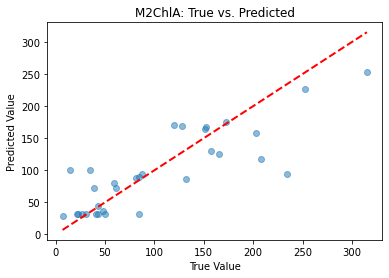

In [24]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, KFold
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

testsize = 0.2
folds = 5
classifiedbins = 9
Nfeature = 9

X = dataset[top_15_features]

y = dataset["ChlA"]

dataset_ranges = pd.cut(dataset['ChlA'], bins=classifiedbins,labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=42)

# Initialize RFE
selector = RFE(xgb.XGBRegressor(objective='reg:squarederror'), n_features_to_select=Nfeature)

# Fit RFE
selector = selector.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[selector.support_]


# Split data into train and test sets using selected features
#X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


if 'Month_sin' not in selected_features:
    selected_features = selected_features.append(pd.Index(['Month_sin']))
if 'Month_cos' not in selected_features:
    selected_features = selected_features.append(pd.Index(['Month_cos']))
    
print("testsize", testsize)
print("Kfolds", folds)
print("classified bins", classifiedbins)
print("Number of features", Nfeature)

print("Selected feature:", selected_features)
    
X = dataset[dataset.columns[4:]]
# Split the data into training and testing sets, ensuring stratified sampling based on ChlA ranges
dataset_ranges = pd.cut(dataset['ChlA'], bins=classifiedbins,labels=False)
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=testsize, random_state=42, stratify=dataset_ranges)
#Normal split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# function to optimize (based on R-squared)
def objective(params):
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **params)
    r2_list = []
    mae_list = []
    rmse_list = []
  
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    #kfold = KFold(n_splits=folds, shuffle=False)
    for train_index, test_index in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train the model with the current hyperparameters on the training fold
        xgb_model.fit(X_train_fold, y_train_fold)

        # Evaluate the model on the validation fold
        y_pred_fold = xgb_model.predict(X_val_fold)

        # Calculate R-squared- MAE - RMSE for the validation fold
        r2 = r2_score(y_val_fold, y_pred_fold)
        r2_list.append(r2)
        mae = mean_absolute_error(y_val_fold, y_pred_fold)
        mae_list.append(mae)
        rmse = mean_squared_error(y_val_fold, y_pred_fold, squared=False)
        rmse_list.append(rmse)
        
  

    # Calculate averages
    avg_r2 = sum(r2_list) / len(r2_list)
    avg_mae = sum(mae_list) / len(mae_list)
    avg_rmse = sum(rmse_list) / len(rmse_list)



    return {'loss': -avg_r2, 'rmse': avg_rmse, 'mae':avg_mae, 'Rsquare':avg_r2, 'status': STATUS_OK}

# hyperparameter search space
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 100, 1)),
    'max_depth': hp.choice('max_depth', range(5, 50, 1)),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.5),
    'alpha': hp.uniform('alpha', 0, 1),  
    'lambda': hp.uniform('lambda', 0, 1),
    'gamma': hp.uniform('gamma', 0, 1) #defined for dynamic learning rate
}


# keep track of optimization results
trials = Trials()

# Perform Bayesian Optimization to maximize R-squared by using fmin function
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Get the best hyperparameters by using the indices of them
best_xgb_params = {
    'n_estimators': range(10, 100, 1)[best['n_estimators']],
    'max_depth': range(5, 50, 1)[best['max_depth']],
    'learning_rate': best['learning_rate'],
    'alpha': best['alpha'],
    'lambda': best['lambda'],
    'gamma': best['gamma']
}

# Train the final model on the training set with the best hyperparameters
final_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_xgb_params)
final_xgb_model.fit(X_train, y_train)

# Use the final model on the test set
y_pred_test = final_xgb_model.predict(X_test)

#time series plot


# Calculate metrics on the test set
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# Print the results
print("Best Hyperparameters:")
print(best_xgb_params)



print("\nTest Metrics:")
print("Test R-squared:", r2_test)
print("Test MAE:", mae_test)
print("Test RMSE:", rmse_test)

best_metrics = trials.best_trial['result']
print("\nValidation Metrics for Best Hyperparameters:")
print("Validation R-squared:", best_metrics["Rsquare"])
print("Validation MAE:", best_metrics['mae'])
print("Validation RMSE:", best_metrics['rmse'])


plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title(fr"{modelname}: True vs. Predicted")

plt.savefig(fr'D:\AliFarrokhi\Albufera models\{modelname}.png', bbox_inches='tight', pad_inches=0.5, facecolor='w')
plt.show()

In [28]:
import joblib

# Save the final_xgb_model in joblib format
joblib.dump(final_xgb_model, fr'D:\AliFarrokhi\Albufera models\{modelname}.joblib')

['D:\\AliFarrokhi\\Albufera models\\M2ChlA.joblib']